In [1]:
from PIL import Image
import requests
from transformers import AutoProcessor, LlavaForConditionalGeneration
import torch

In [2]:
model = LlavaForConditionalGeneration.from_pretrained(
    "llava-calm2-siglip",
    torch_dtype=torch.bfloat16,
).to(0)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
processor = AutoProcessor.from_pretrained("llava-calm2-siglip")

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [4]:
prompt = """USER: <image>
この画像を説明してください。
ASSISTANT: """

url = "https://unsplash.com/photos/LipkIP4fXbM/download?force=true&w=640"

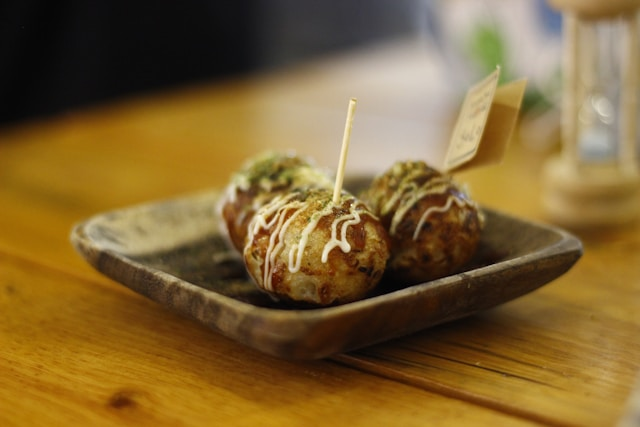

In [5]:
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

In [6]:
inputs = processor(text=prompt, images=image, return_tensors="pt").to(0, torch.bfloat16)
inputs

{'input_ids': tensor([[26168,    27,   208, 65000,   186,   941,  5405, 25345,   331,  1415,
           260,   186, 14719,  9078, 18482,    27,   208]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[-0.9375, -0.9297, -0.9297,  ..., -0.0118, -0.0039,  0.0039],
          [-0.9375, -0.9297, -0.9297,  ..., -0.0197, -0.0118, -0.0039],
          [-0.9375, -0.9297, -0.9297,  ..., -0.0275, -0.0275, -0.0197],
          ...,
          [ 0.3574,  0.3730,  0.3496,  ...,  0.2637,  0.2314,  0.1846],
          [ 0.3574,  0.3730,  0.3652,  ...,  0.2793,  0.2393,  0.2002],
          [ 0.3574,  0.3809,  0.3730,  ...,  0.2949,  0.2471,  0.2236]],

         [[-0.9375, -0.9297, -0.9297,  ..., -0.2393, -0.2471, -0.2393],
          [-0.9375, -0.9297, -0.9297,  ..., -0.2471, -0.2559, -0.2471],
          [-0.9375, -0.9297, -0.9297,  ..., -0.2715, -0.2715, -0.2559],
          ...,
          [-0.0981, -0.0825, -0.106

In [7]:
%%time
generate_ids = model.generate(**inputs,
                              max_length=500,
                              do_sample=True,
                              temperature=0.2,
                    )

D:\Python\Python311\Lib\site-packages\transformers\models\llama\modeling_llama.py:649: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


CPU times: total: 1min 50s
Wall time: 1min 38s


In [8]:
generate_ids

tensor([[26168,    27,   208, 65000,   186,   941,  5405, 25345,   331,  1415,
           260,   186, 14719,  9078, 18482,    27,   208,  5405,   613,   255,
          1718, 18142, 12221,  4228, 55488,    20,  3956, 53516,  9238,   277,
          1864,  2091,   260, 53516,  9238,   276,   255, 54624, 20781,  5310,
           586, 13439,  4453,   343,  9238,   255,  4142, 48281, 33372,  6814,
           260, 53516,  9238,  4228,   613,   255,  9929,   255, 46599,   959,
          1594,   255,  4038,   396, 63207,   255,  3369, 39451, 61466,  2091,
           260, 53516,  9238,   276,   255,  9929,   255, 46599,   959,  1594,
           255,  4038,   396, 63207,   255,  3369, 39451,   277, 44441,  7115,
          2338,   255, 16860, 17949,  1349,   268, 42642, 61890,  1681,   260,
             0]], device='cuda:0')

In [9]:
output = processor.tokenizer.decode(generate_ids[0][:-1], clean_up_tokenization_spaces=False)
print(output)

USER: <image>
この画像を説明してください。
ASSISTANT: 画像には、木製のテーブルの上に置かれた3つのたこ焼きが映っています。たこ焼きは、小麦粉をベースにした生地を丸く焼き、中にタコを入れたものです。たこ焼きの上には、ソース、マヨネーズ、かつおぶし、青海苔がかかっています。たこ焼きは、ソース、マヨネーズ、かつおぶし、青海苔が絡み合うことで、独特の風味と食感を生み出しています。
